In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importaciones**

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 

In [3]:
print(os.listdir('/content/drive/My Drive/Relojes'))

['imagen_reloj.npy', 'horas_minutos.npy']


# **Carga de la base de datos**

In [4]:
x = np.load('/content/drive/My Drive/Relojes/imagen_reloj.npy')
y = np.load('/content/drive/My Drive/Relojes/horas_minutos.npy')

# **Dimensiones de la base de datos**

In [5]:
x.shape, y.shape
#x -> (2000, 64, 64, 1)

((2000, 64, 64), (2000, 2))

# **Despliegue de algunas imágenes**

label 8.0:5.0


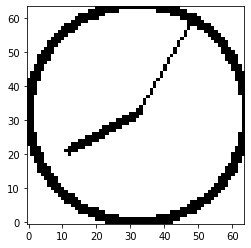

label 11.0:33.0


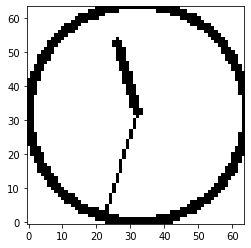

label 3.0:36.0


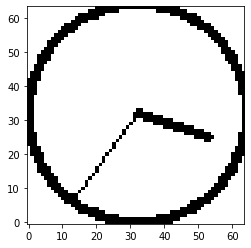

label 9.0:32.0


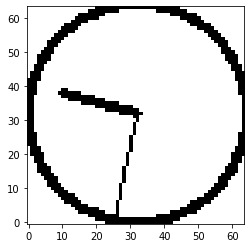

label 2.0:3.0


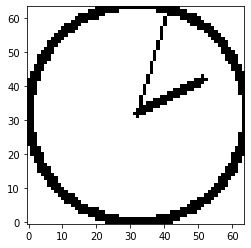

label 0.0:56.0


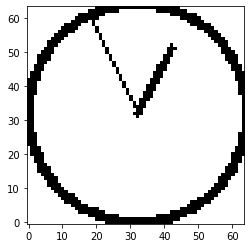

label 2.0:11.0


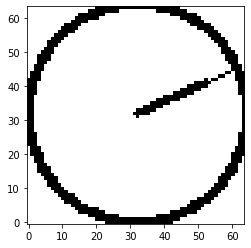

label 3.0:53.0


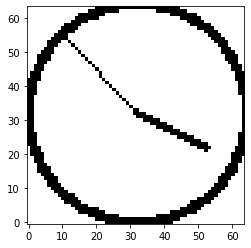

label 3.0:32.0


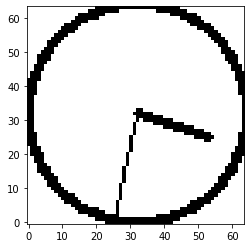

label 10.0:52.0


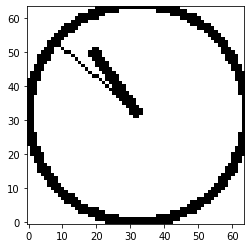

label 6.0:8.0


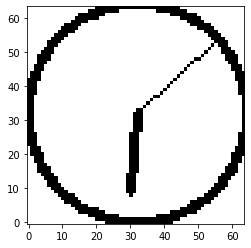

label 0.0:16.0


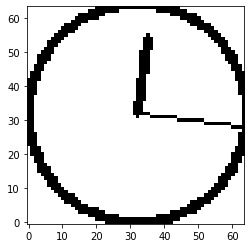

label 0.0:35.0


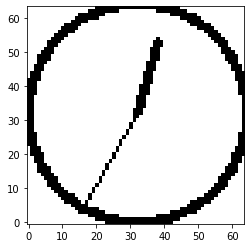

label 10.0:44.0


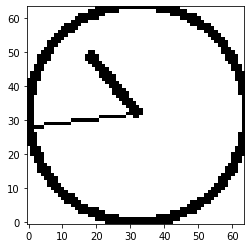

label 11.0:33.0


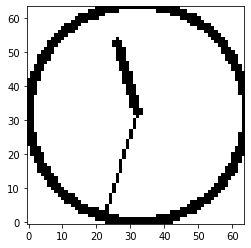

In [6]:
for i in range(15):
    print ("label", "{}:{}".format(y[i][0], y[i][1]))
    img = x[i]
    plt.imshow(img, cmap='Greys', origin="lower")
    plt.show()

# **Redimensionamos el batch de instancias**

In [7]:
x = np.expand_dims(x, axis=-1)

In [8]:
x.shape

(2000, 64, 64, 1)

# **Partición de la base de datos en conjunto de entrenamiento y validación**

In [9]:
train_data = x[:1000]
train_labels = y[:1000]
test_data = x[1000:]
test_labels = y[1000:]

# **Definición de la arquitectura**

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu',
                        input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2))

# **Compilación**

In [12]:
from tensorflow.keras import optimizers

model.compile(loss='mse', #mae -> Mean Absolute Error, mse -> Mean Squared Error
              optimizer=optimizers.Adam(lr=1e-3)) # acc -> accuracy

# **Entrenamiento**

In [13]:
history = model.fit(train_data, train_labels, batch_size=40, epochs=60, validation_data=(test_data,test_labels))

Epoch 1/60
25/25 [==============================] - 0s 14ms/step - loss: 202.6284 - val_loss: 140.5594
Epoch 2/60
25/25 [==============================] - 0s 8ms/step - loss: 94.6942 - val_loss: 78.0867
Epoch 3/60
25/25 [==============================] - 0s 8ms/step - loss: 52.4700 - val_loss: 38.2813
Epoch 4/60
25/25 [==============================] - 0s 8ms/step - loss: 23.3715 - val_loss: 22.9338
Epoch 5/60
25/25 [==============================] - 0s 8ms/step - loss: 14.7077 - val_loss: 12.3232
Epoch 6/60
25/25 [==============================] - 0s 8ms/step - loss: 9.3119 - val_loss: 8.7541
Epoch 7/60
25/25 [==============================] - 0s 8ms/step - loss: 6.7239 - val_loss: 8.0028
Epoch 8/60
25/25 [==============================] - 0s 8ms/step - loss: 6.0657 - val_loss: 7.5687
Epoch 9/60
25/25 [==============================] - 0s 8ms/step - loss: 5.1863 - val_loss: 5.6814
Epoch 10/60
25/25 [==============================] - 0s 8ms/step - loss: 4.4658 - val_loss: 5.6314
Epoch 

# **Curvas de precisión y pérdida**

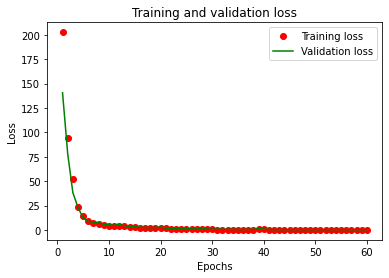

59


In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1
print(min_val_loss_epoch)

# **Comparación entre predicciones (valores obtenidos) y las etiquetas (valores esperados)**

In [20]:
predictions = model.predict(test_data)

print("Ground truth labels", "          ", "Predictions")
for i in range(1000):
  print(test_labels[i, [0,1]], "   ", np.abs(predictions[i,[0,1]]))


Ground truth labels            Predictions
[ 3. 55.]     [ 3.3580596 55.40456  ]
[ 8. 50.]     [ 7.996951 49.801773]
[ 2. 24.]     [ 2.0260026 25.032501 ]
[ 6. 48.]     [ 6.018222 48.366   ]
[ 5. 11.]     [ 5.071479  11.1259575]
[ 2. 55.]     [ 2.2506015 55.43178  ]
[0. 8.]     [0.01271538 8.152787  ]
[ 5. 21.]     [ 5.1892233 21.402166 ]
[4. 5.]     [4.0779867 4.8572836]
[ 2. 45.]     [ 2.1529143 44.89526  ]
[10. 50.]     [10.208214 52.17515 ]
[ 6. 44.]     [ 5.9655595 44.010426 ]
[ 5. 12.]     [ 5.0057893 12.264979 ]
[ 2. 59.]     [ 1.989355 59.81408 ]
[11. 52.]     [11.159975 52.619297]
[10. 34.]     [10.110819 34.584602]
[ 3. 42.]     [ 3.1229615 42.344627 ]
[ 0. 50.]     [ 0.16510142 50.723682  ]
[ 0. 59.]     [ 0.12378778 59.45666   ]
[ 3. 26.]     [ 2.958249 27.336178]
[ 3. 45.]     [ 3.098569 45.160686]
[ 0. 31.]     [ 0.08623733 31.392242  ]
[ 0. 57.]     [ 0.1901399 57.392933 ]
[ 1. 58.]     [ 1.1844195 58.281868 ]
[ 8. 59.]     [ 8.009316 59.48097 ]
[ 6. 32.]     [ 6.108786 

# **Método para obtener la precisión**

In [21]:
def get_accuracy(validation_data, validation_labels):
    predictions = np.round(model.predict(validation_data))
    error = predictions - validation_labels
    a = np.min(np.abs(error), axis=1)
    return np.count_nonzero(a==0)/a.shape[0]

# **Precisión en el conjunto de entrenamiento**

In [16]:
print(get_accuracy(train_data, train_labels))

1.0


# **Precisión en el conjunto de validación**

In [22]:
print(get_accuracy(test_data, test_labels))

0.993
